# 1.강화학습

## 강화학습의 개념

강화학습(Reinforcement Learning)을 이해하려면 강화학습과 행동심리학, 머신러닝의 연관성에 대해 알아야 합니다.
Skinner라는 행동심리학자는 시행착오를 통해 학습하는 방법을 강화라는 개념으로 제시하였습니다. 동물들이 이것 저것 여러 행동을 시도해보면서 그 결과를 통해 행위를 학습하는 것을 말합니다.
강화라는 개념에서 핵심적인 역할을 하는 것이 바로 보상입니다. 강화학습을 하는 동물의 경우 행동과 좋은 보상 사이의 상관관계를 학습하여 보상을 받는 빈도를 증가시키는 방향으로 행동합니다. = 강아지한테 간식으로 행동을 교정하는것

## 머신러닝과 강화학습

여태까지 여러분들이 머신러닝을 공부하며 배운 개념은 크게 지도학습 그리고 비지도학습의 개념입니다. 지도학습의 경우 정답을 알고 있는 데이터를 이용해 학습을 시킵니다. 정답과 예측값의 차이를 이용해 학습합니다. 비지도학습은 정답이 있는 것은 아니지만 여러 데이터의 비슷한 것끼리 묶어주는 클러스터링을 이용한 학습이 비지도학습입니다. 

이 스터디에서 공부할 강화학습은 이 두 개념에서 벗어나 정답이 주어진 것도 아니고 데이터에 따라 학습하는 것도 아닙니다. 강화학습은 컴퓨터가 선택한 행동에 따른 보상을 기준으로 학습을 시킵니다. 

## 에이전트

### 강화학습을 통해 학습하는 컴퓨터
에이전트는 환경에 대한 사전지식이 없는 상태에서 학습을 시작합니다. 환경은 에이전트가 선택한 행동에 따라 보상을 주고 다음 상태를 알려줍니다. 이를 통해 에이전트는 어떤 행동이 최적의 행동인지 간접적으로 알게 됩니다.

### 최적의 행동양식, 또는 정책
강화학습의 목적은 에이전트가 환경을 탐색하면서 얻는 보상들의 합을 최대화하는 것입니다. 보상은 양수로 설정할 수도 있고 경우에 따라 음수로 설정할 수도 있습니다.
상과 벌을 적절히 융합할 수 있으면 효과적인 학습이 가능합니다.

## 강화학습 문제
강화학습은 결정을 순차적으로 내려야 하는 문제에 적용됩니다.
## 순차적 행동 결정 문제
에이전트가 학습하고 발전하려면 문제를 수학적으로 표현해야 합니다. EX) 학생들의 수학능력을 시험을 통해 수치적으로 표현

순차적으로 행동을 결정하는 문제를 정의할 때 사용하는 방법이 MDP(Markov Decision Process)입니다.

## 순차적 행동 결정 문제의 구성 요소

### 1) 상태
에이전트의 현재 상태에 대한 정적인, 동적인 요소들 
EX) 에이전트가 탁구를 친다고 가정할 때 
정적인 요소 : 에이전트의 위치, 탁구공의 위치
동적인 요소 : 속도, 가속도 
### 2) 행동
에이전트가 어떠한 상태에서 취할 수 있는 행동
EX) 상화좌우로 움직이는 행동
학습이 되지 않은 에이전트는 어떤 행동이 좋은 행동인지 모르기 때문에 무작위로 행동을 취합니다.
### 3) 보상
에이전트의 행동에 따라 지급되는 보상
에이전트가 학습할 수 있는 유일한 정보
### 4) 정책
순차적 행동 결정 문제를 풀었다고 한다면 가장 좋은 정책을 에이전트가 얻었다는 의미입니다.
에이전트가 학습을 통해 목표로 하는 것이 최적 정책입니다.

## 방대한 상태를 가진 문제에서의 강화학습

바둑에서 가능한 경우의 수는 10^360개입니다. 경우의 수가 매우 많지만 유한개입니다. 그동안 성능의 문제로 바둑의 최적 정책을 해결하지 못했지만, 컴퓨터 성능의 향상으로 알파고가 탄생했습니다.
하지만 로봇의 학습의 경우 로봇이 관찰하는 정보와 행동 보상이 연속적이기 때문에 가능한 경우의 수가 무한대에 가깝습니다. 로봇이 취할 수 있는 행동의 개수도 많아서 모델이 상당히 복잡해집니다. 강화학습과 인공신경망의 결합으로 로봇이 레고를 쌓는 정도의 학습이 가능해지게 되었습니다.


## 강화학습의 예시 : breakout

In [3]:
%matplotlib inline

import gym
import numpy as np
from matplotlib import pyplot as plt
env = gym.envs.make("Breakout-v0")

-Breakout은 흔히 벽돌깨기 게임으로 알려져 있습니다. 이 게임에서 에이전트는 정지, 발사, 왼쪽, 오른쪽 이 네 가지 행동을 할 수 있습니다.

In [5]:
print("Action space size: {}".format(env.action_space.n)) #행동의 개수를 표시합니다.
print(env.get_action_meanings()) #행동의 의미에 대해서 표시합니다.
# env.unwrapped.get_action_meanings() for gym 0.8.0 or later

observation = env.reset() #환경을 초기화합니다.
print("Observation space shape: {}".format(observation.shape)) #환경이 표시되는 공간의 크기를 표시합니다.

Action space size: 4
['NOOP', 'FIRE', 'RIGHT', 'LEFT']
Observation space shape: (210, 160, 3)


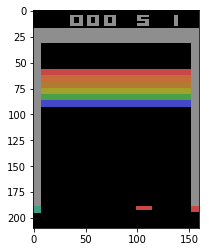

In [7]:
plt.figure()
plt.imshow(env.render(mode='rgb_array')) #초기화된 환경을 표시합니다.

-에이전트는 다음과 같은 방식으로 행동을 취합니다. 위의 초기화된 그림과 아래의 행동을 선택한 그림의 차이를 보면 어떤 방식으로 행동을 하는 지 알 수 있습니다.

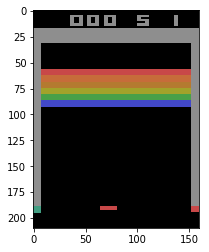

In [8]:
[env.step(3) for x in range(3)] # 3번 행동을 3번 수행합니다.
plt.figure()
plt.imshow(env.render(mode='rgb_array')) #행동을 수행한 결과를 표시합니다. 오른쪽으로 3번 이동한 것을 볼 수 있습니다.

env.close()

출처 : https://github.com/dennybritz/reinforcement-learning

그 다음 학습과 그 결과에 대한 코드와 결과는 별도로 보겠습니다.